In [1]:
import numpy as np
import seaborn as sb
import pandas as pd 
import matplotlib.pyplot as plt
import copy
import scipy as sp

from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

Створюємо датафрейм та перевіряємо на наявність порожніх даних

In [2]:
df = pd.read_csv("C:/Users/LEGION/anaconda3/wineQT.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [3]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


Позбуваємось непотрібної колонки

In [4]:
df = df.drop(columns=['Id'])

Будуємо Хітмапу

(12.5, -0.5)

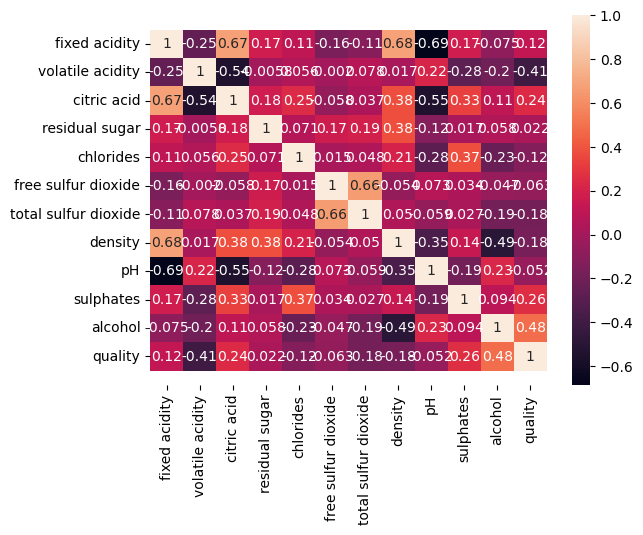

In [5]:
ax = plt.axes()
sb.heatmap(df.corr(), annot = True, ax = ax)
i, k = ax.get_ylim() 
ax.set_ylim(i+0.5, k-0.5)

Гістограми

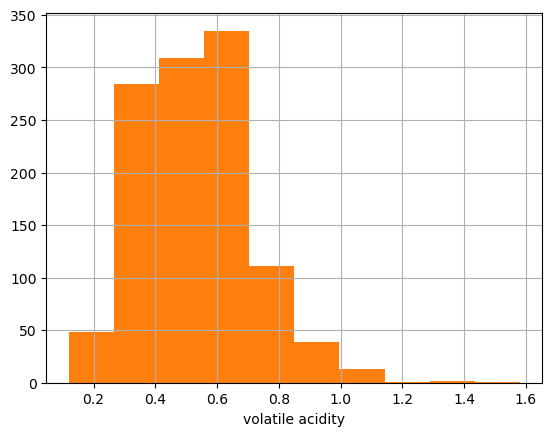

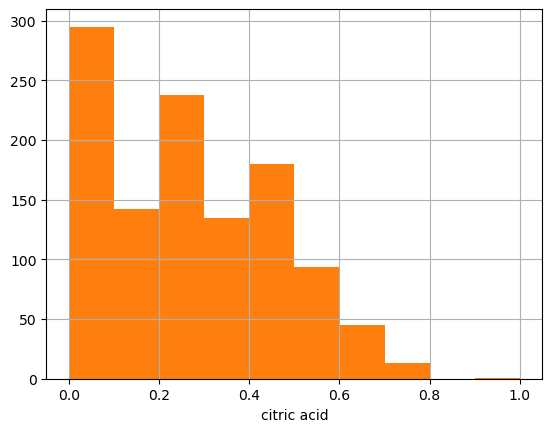

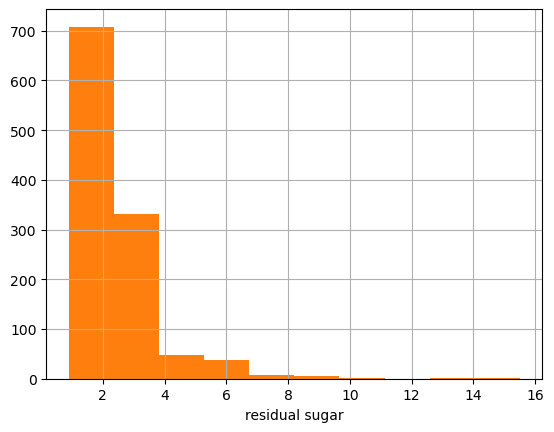

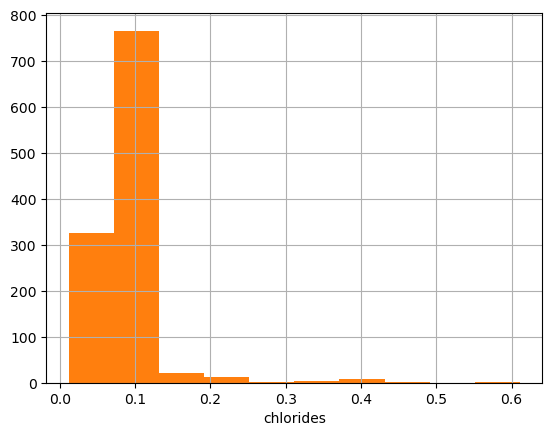

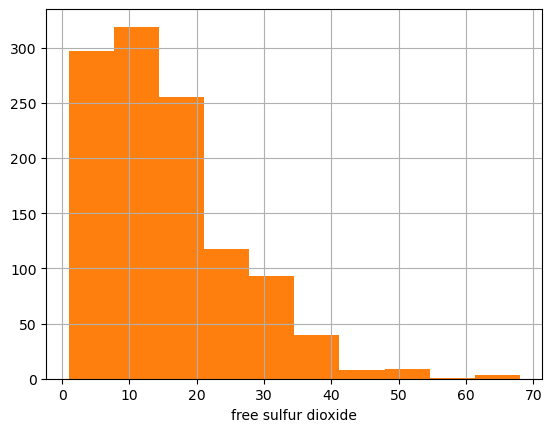

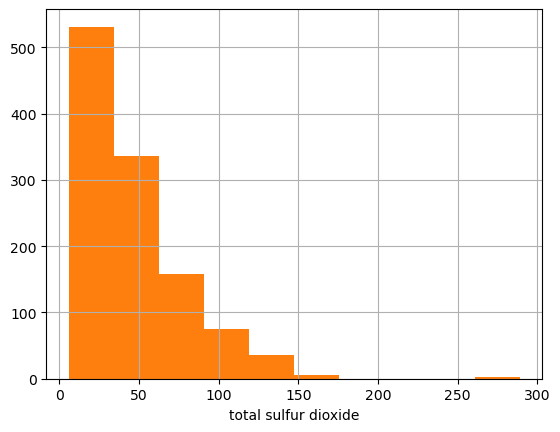

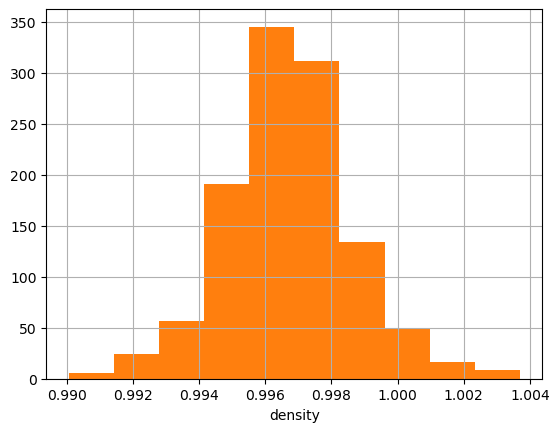

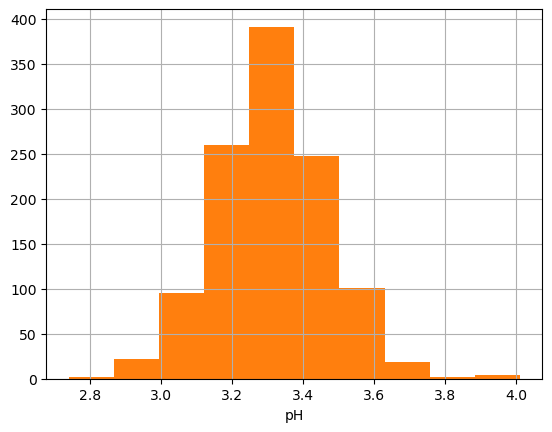

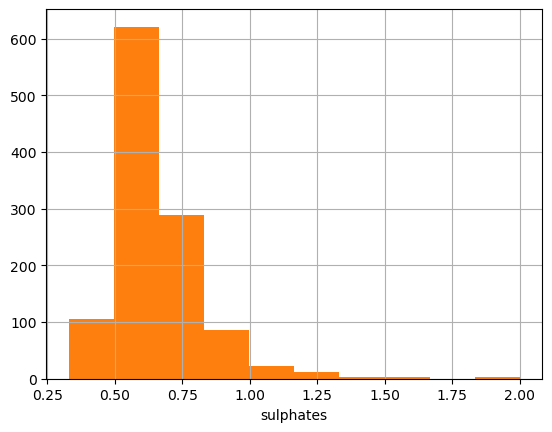

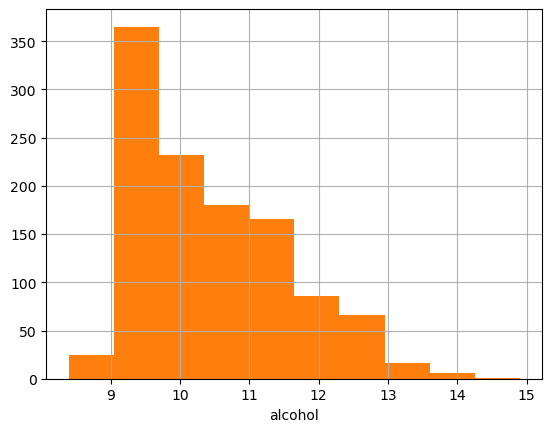

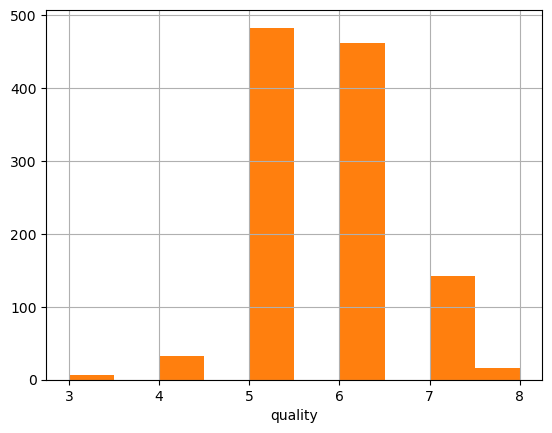

In [6]:
for i in range (1,len(df.columns)):
    hist = df[df.columns[i]].hist()
    plt.hist(df[df.columns[i]])
    plt.xlabel(df.columns[i])
    plt.show()

Будуємо Boxplot-и для основних ознак

<AxesSubplot:xlabel='quality', ylabel='fixed acidity'>

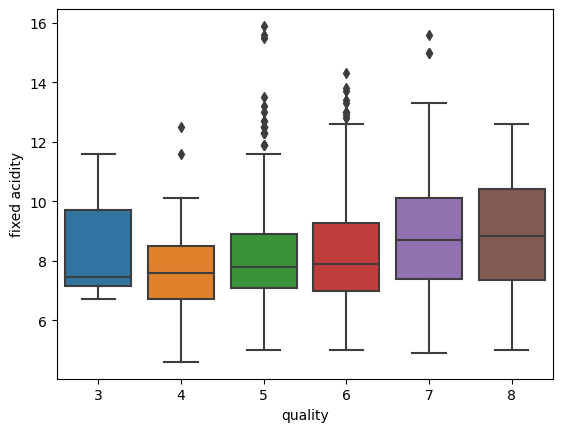

In [7]:
sb.boxplot(x ='quality', y = 'fixed acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='volatile acidity'>

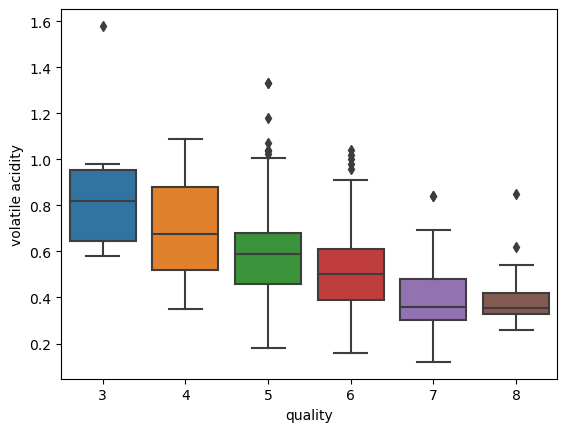

In [8]:
sb.boxplot(x ='quality', y = 'volatile acidity', data = df)

<AxesSubplot:xlabel='quality', ylabel='citric acid'>

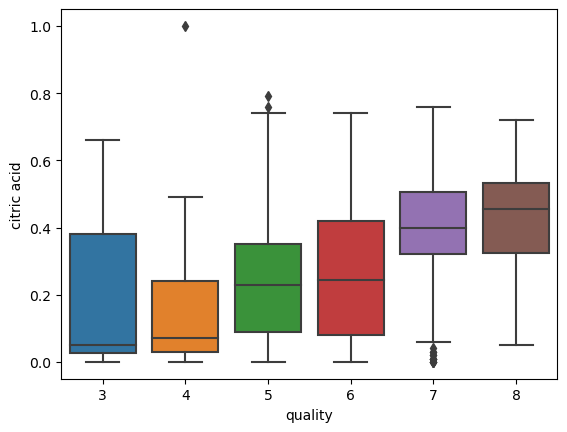

In [9]:
sb.boxplot(x ='quality', y = 'citric acid', data = df)

<AxesSubplot:xlabel='quality', ylabel='alcohol'>

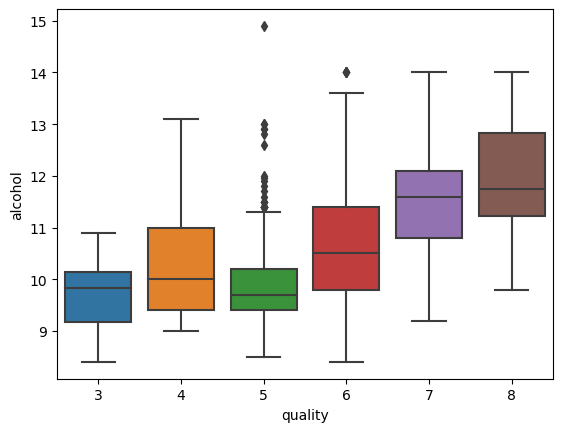

In [10]:
sb.boxplot(x ='quality', y = 'alcohol', data = df)

Розділяємо датасет

In [11]:
X = df.iloc[:,0:-1]
y = df.iloc[:,-1]

Перевіряємо фічі на збалансованість

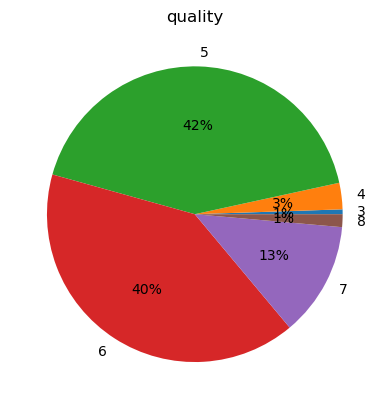

In [12]:
target_var=pd.crosstab(index=df['quality'],columns='% observations')
plt.pie(target_var['% observations'],labels=target_var['% observations'].index,autopct='%.0f%%')
plt.title('quality')
plt.show()

Використаємо SMOT для урівняння наших класів

In [13]:
sm = SMOTE(sampling_strategy='auto', random_state=42)
X,y = sm.fit_resample(X,y)

Тепер оберемо фічі для навчання залежно від їх важливості

fixed acidity : 2.09%
volatile acidity : 32.44%
citric acid : 10.16%
residual sugar : 0.19%
chlorides : 1.85%
free sulfur dioxide : 3.28%
total sulfur dioxide : 4.24%
density : 4.52%
pH : 5.20%
sulphates : 7.37%
alcohol : 28.67%


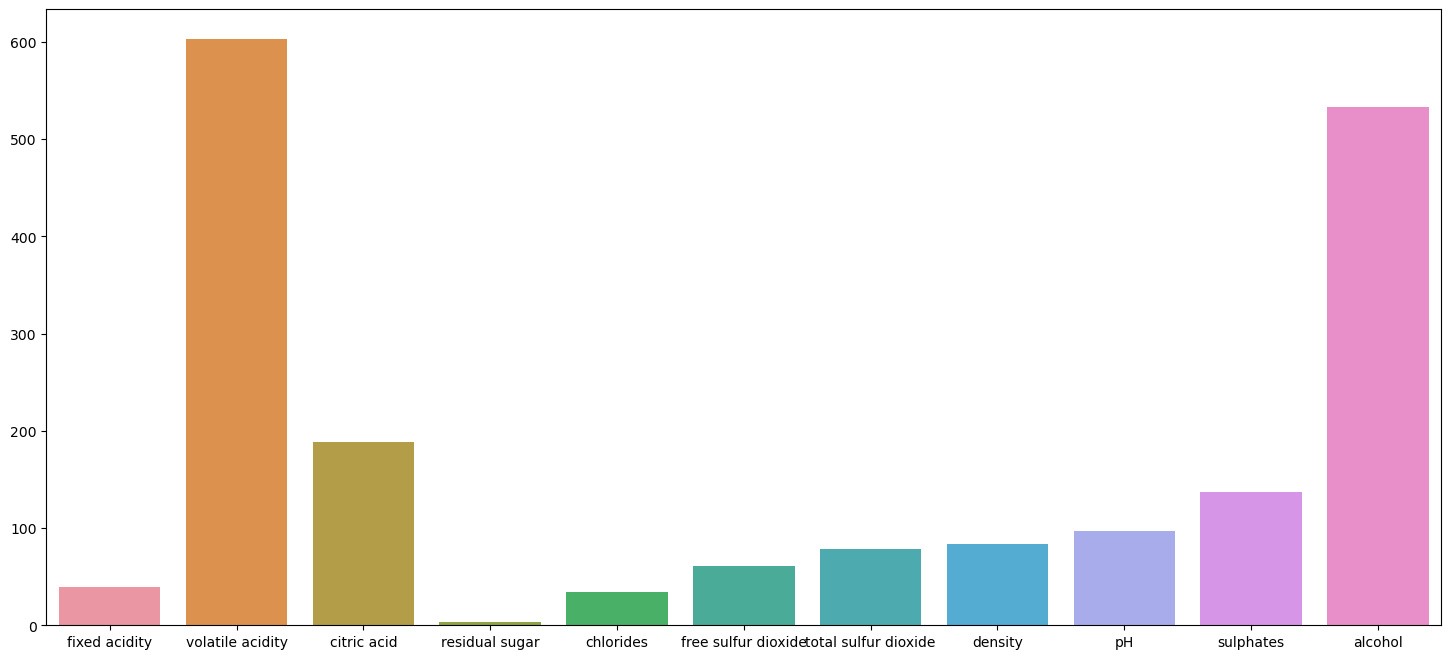

In [14]:
fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X, y)
feature_contribution=(fs.scores_/sum(fs.scores_))*100
for i,j in enumerate(X.columns):
    print(f'{j} : {feature_contribution[i]:.2f}%')
plt.figure(figsize=(18,8))
sb.barplot(x=X.columns,y=fs.scores_)
plt.show()

In [15]:
X1 = X[['volatile acidity','citric acid','chlorides','total sulfur dioxide','density','sulphates','alcohol']]
X_train, X_test, y_train, y_test=train_test_split(X1, y, test_size = 0.30, stratify = y, random_state = 42)

Виконуємо стандартизацію (при нормалізації показники точності виявились нижчі)

In [16]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

Задаємо параметри для візуального виводу

In [17]:
def Metrics(model, X_test, y_test):
    y_pred = model.predict(X_test)

    print(classification_report(y_test,y_pred))

    ax = plt.axes()
    CM = confusion_matrix(y_test, y_pred)
    sb.heatmap(CM, annot = True, ax = ax, xticklabels=["3", "4", "5", "6", "7", "8"], yticklabels=["3", "4", "5", "6", "7", "8"])
    ax.set_title('Confusion Matrix')
    i, k = ax.get_ylim() 
    ax.set_ylim(i+0.5, k-0.5)
    plt.show()

KNearestNeighbors

In [18]:
parameters = {'n_neighbors': np.arange(1,42,5)}

grid = GridSearchCV(KNeighborsClassifier(), parameters, scoring = "accuracy")
grid.fit(X_train, y_train)

knn = grid.best_estimator_

Model: KNeighborsClassifier(n_neighbors=1)
Train score: 1.0
Test accuracy Score: 0.8195402298850575
              precision    recall  f1-score   support

           3       0.92      1.00      0.96       145
           4       0.84      0.94      0.89       145
           5       0.73      0.59      0.65       145
           6       0.66      0.50      0.57       145
           7       0.77      0.90      0.83       145
           8       0.93      0.98      0.95       145

    accuracy                           0.82       870
   macro avg       0.81      0.82      0.81       870
weighted avg       0.81      0.82      0.81       870



C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

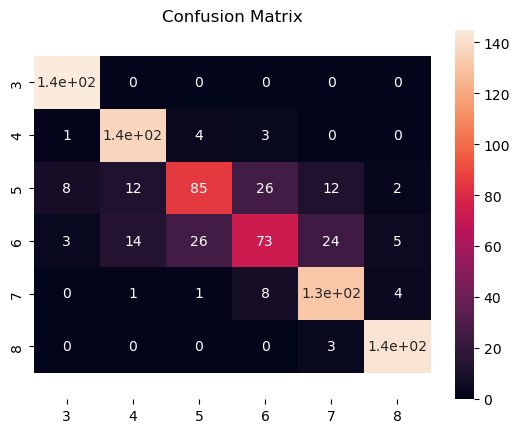

In [19]:
print("Model:", knn)
print('Train score:', knn.score(X_train, y_train))
print('Test accuracy Score:', knn.score(X_test, y_test))
Metrics(knn, X_test, y_test)

Дерево Рішень

Model: DecisionTreeClassifier(criterion='entropy', random_state=42)
Train score: 1.0
Test accuracy Score: 0.7517241379310344
              precision    recall  f1-score   support

           3       0.96      0.98      0.97       145
           4       0.80      0.85      0.83       145
           5       0.60      0.55      0.58       145
           6       0.50      0.46      0.48       145
           7       0.73      0.79      0.76       145
           8       0.88      0.88      0.88       145

    accuracy                           0.75       870
   macro avg       0.75      0.75      0.75       870
weighted avg       0.75      0.75      0.75       870



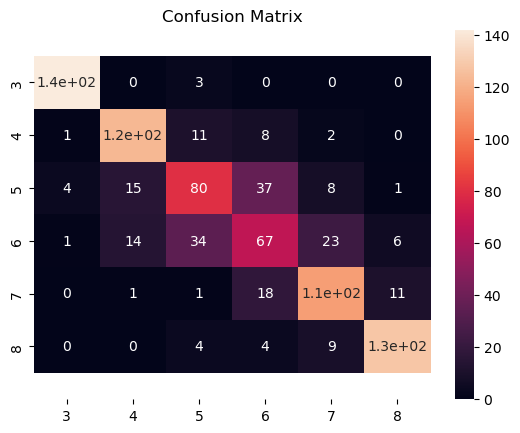

In [20]:
dectree=DecisionTreeClassifier(criterion = 'entropy', random_state = 42)
dectree.fit(X_train,y_train)
print("Model:", dectree)
print('Train score:', dectree.score(X_train, y_train))
print('Test accuracy Score:', dectree.score(X_test, y_test))
Metrics(dectree, X_test, y_test)

SVM

Model: SVC(random_state=42)
Train score: 0.7189349112426036
Test accuracy Score: 0.6793103448275862
              precision    recall  f1-score   support

           3       0.85      1.00      0.92       145
           4       0.70      0.65      0.67       145
           5       0.58      0.54      0.56       145
           6       0.50      0.40      0.44       145
           7       0.63      0.56      0.59       145
           8       0.73      0.92      0.81       145

    accuracy                           0.68       870
   macro avg       0.66      0.68      0.67       870
weighted avg       0.66      0.68      0.67       870



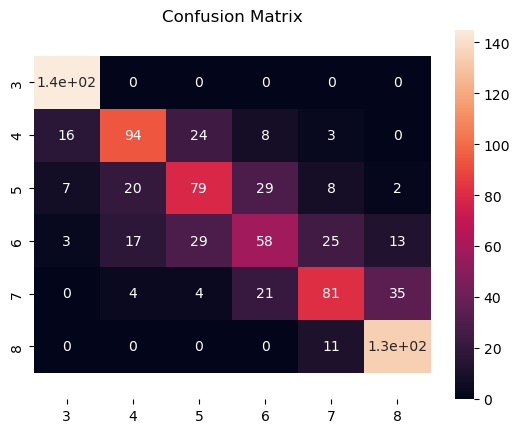

In [21]:
SVM=SVC(kernel = 'rbf', random_state = 42)
SVM.fit(X_train,y_train)
print("Model:", SVM)
print('Train score:', SVM.score(X_train, y_train))
print('Test accuracy Score:', SVM.score(X_test, y_test))
Metrics(SVM, X_test, y_test)

Random Forest

Model: RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)
Train score: 0.9955621301775148
Test accuracy Score: 0.7942528735632184
              precision    recall  f1-score   support

           3       0.97      0.99      0.98       145
           4       0.86      0.90      0.88       145
           5       0.65      0.61      0.63       145
           6       0.52      0.50      0.51       145
           7       0.84      0.81      0.82       145
           8       0.90      0.95      0.93       145

    accuracy                           0.79       870
   macro avg       0.79      0.79      0.79       870
weighted avg       0.79      0.79      0.79       870



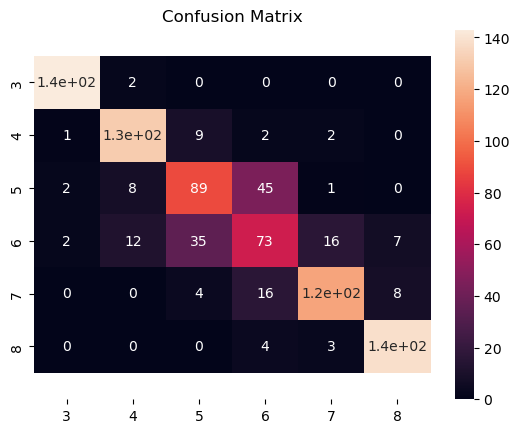

In [22]:
forest=RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
forest.fit(X_train,y_train)
print("Model:", forest)
print('Train score:', forest.score(X_train, y_train))
print('Test accuracy Score:', forest.score(X_test, y_test))
Metrics(forest, X_test, y_test)

AdaBoost

Model: AdaBoostClassifier(learning_rate=0.01, n_estimators=100)
Train score: 0.4349112426035503
Test accuracy Score: 0.44022988505747124
              precision    recall  f1-score   support

           3       0.53      0.99      0.69       145
           4       0.40      0.30      0.34       145
           5       0.51      0.36      0.42       145
           6       0.30      0.30      0.30       145
           7       0.41      0.68      0.52       145
           8       0.00      0.00      0.00       145

    accuracy                           0.44       870
   macro avg       0.36      0.44      0.38       870
weighted avg       0.36      0.44      0.38       870



C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\LEGION\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


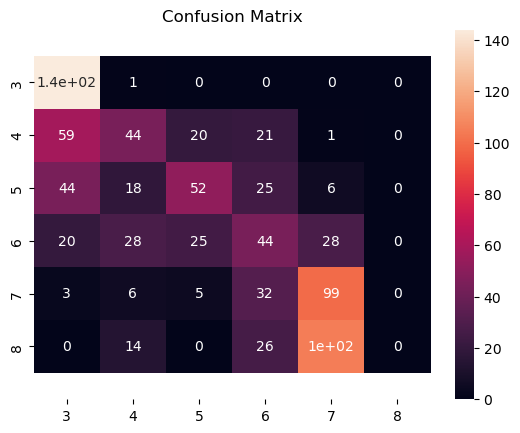

In [23]:
adaboost = AdaBoostClassifier(n_estimators = 100, learning_rate = 0.01)
adaboost.fit(X_train, y_train)
print("Model:", adaboost)
print('Train score:', adaboost.score(X_train, y_train))
print('Test accuracy Score:', adaboost.score(X_test, y_test))
Metrics(adaboost, X_test, y_test)

In [ ]:
Висновок: Найкращі показники точності на даному датасеті продемонстрували алгоритми KNN(0.82) та Random Forest (0.79),
найгірші - у АdaBoost. Також, виходячи з візуалізації показників, переважна більшість представників Vinho Verde мають схожі
параметри хлоридів та сульфатів